# Questão 2
Seja f : [−a, a] → R a função definida por f(x) = e^x

## (a)
Calcule o polinômio de Taylor P2(x) de ordem dois de f(x) na origem.

As derivadas da função e^x são ela própia, logo o polinômio de grau 2 é:
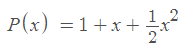

## (b)
Qual o maior valor de a para o qual podemos usar P2(x) para aproximar f(x) com erro inferior a 0.005 em todo o intervalo [−a, a]?

In [54]:
# Função retirada do código da aula do Abel sobre Polinômio de Taylor
function exp1(x, n)
    s = 1.0
    for k = 1:n
        s += x^k / factorial(BigInt(k))
    end
    return s
end

exp1 (generic function with 1 method)

In [55]:
exp1(0.1425,2)

1.15265312499999998674393708597563090734183788299560546875

In [56]:
exp(0.1425)

1.1531530809573696

In [57]:
abs(exp1(0.1425,2) - exp(0.1425))

0.00049995595736958275967509734982741065323352813720703125

Após testar alguns valores parece converger para 0.1425 o maior valor de **a** possível.

In [53]:
abs(exp1(0.1425,2) - exp(0.1425)) < 0.0005

true

# Questão 3

## (a)

In [145]:
function seno(x, n, erro)
    s = 0.0
    i = 1
    sinal = 1
    while (i < n && abs(s - sin(x)) > erro)
        s += sinal * (x^i / factorial(BigInt(i)))
        i+=2
        sinal = sinal * (-1)
    end
    
    return s, "Número de termos usados: $i"
end

seno (generic function with 2 methods)

In [146]:
seno(1, 200, 1e-15)

(0.8414709848078965148536032445151648388498684172509258099049571193984514868423895, "Número de termos usados: 19")

## (b)

In [147]:
seno(2, 200, 10e-7)

(0.9092974515196737418959641181863404085626307848530070752292974515196737418959586, "Número de termos usados: 15")

# Questão 5
Seja f(x) = ln(x + 1). Aproxime f(1.5) usando o polinômio de Taylor de terceira ordem. Quantos dígitos corretos possui a aproximação? Quantos termos deve ter o polinˆomio para o erro de truncamento ser menor que 10^−8?

Padrão dos termos do polinômio de Taylor da função ln(x+1) em torno de 0:
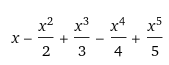

Dado a visualização desses termos iniciais conclui-se que o padrão é ∑ x^i / i , com os sinais alternando por termo

In [224]:
function ln(x, n, erro)
    s = x
    i = 0
    sinal = -1
    while (i < n && abs(s - log(x)) > erro)
        s += sinal * (x^(i+2.0) / (i+2.0))
        i+=1
        sinal = sinal * (-1)
    end
    erroFinal = abs(s - log(x))
    return s, "erro $erroFinal", "Número de termos usados: $i"
end

ln (generic function with 1 method)

In [225]:
log(1.5)

0.4054651081081644

In [226]:
ln(1.5, 3, 0)

(0.234375, "erro 0.17109010810816438", "Número de termos usados: 3")

A aproximação acertou apenas no dígito do inteiro, nos decimais errou desde o primeiro decimal

In [227]:
ln(1.5, 50, 10e-8)

(1.116356200998004e7, "erro 1.1163561604514932e7", "Número de termos usados: 50")

In [228]:
ln(1.5, 100, 10e-8)

(3.608446775186508e15, "erro 3.6084467751865075e15", "Número de termos usados: 100")

Podemos perceber que esse erro nunca será alcançado pois a soma de termos quando muito grande piora a aproximação